<a href="https://colab.research.google.com/github/DamienJakeGestiada/CPE-031-Visualization-And-Data-Analysis/blob/main/HOAExploring_Data_Visually_activiy_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploring Data Visually**





---



**Discussions:**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics and gain insights before formal modeling. Visual exploration helps identify trends, relationships, and data quality issues.

Key Components:

Univariate Analysis:
Analyzing one variable at a time (e.g., histograms, bar charts).

Bivariate Analysis:
Exploring relationships between two variables (e.g., scatterplots, crosstabs).

Missing Data Analysis:
Identifying and handling missing or null values.

Time-Series Visualization:
Displaying data across time to reveal trends or seasonality.

Geospatial Visualization:
Mapping data to geographical regions to identify spatial patterns.

EDA is both an art and science combining statistical summaries with visual intuition.

**Procedures:**

**Color and Perception**

Section 1: Organizing and Exploring Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample dataset
data = {
    "Product": ["Juice", "Smoothie", "Juice", "Smoothie", "Juice", "Smoothie"],
    "Region": ["North", "South", "East", "West", "North", "East"],
    "Sales": [120, 150, 90, 110, 130, 170],
    "Profit": [30, 45, 20, 25, 35, 50]
}
df = pd.DataFrame(data)

# Display the dataset
df

,Product,Region,Sales,Profit
0,Juice,North,120,30
1,Smoothie,South,150,45
2,Juice,East,90,20
3,Smoothie,West,110,25
4,Juice,North,130,35
5,Smoothie,East,170,50


Task 1: Analyzing Variables One at a Time

/tmp/ipython-input-2975764973.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Region", data=df, palette="Set2")


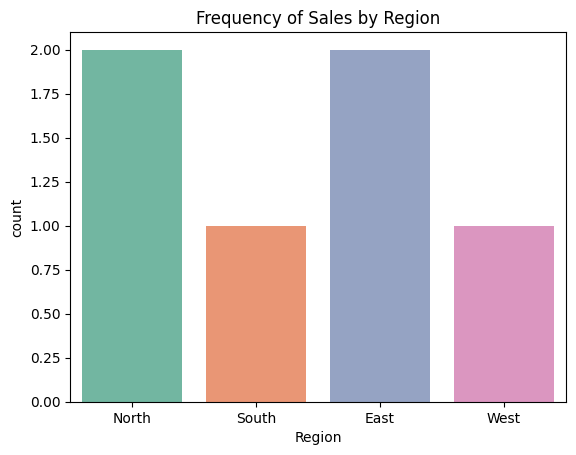

In [3]:
#Categorical Variable
# Countplot for categorical variable
sns.countplot(x="Region", data=df, palette="Set2")
plt.title("Frequency of Sales by Region")
plt.show()


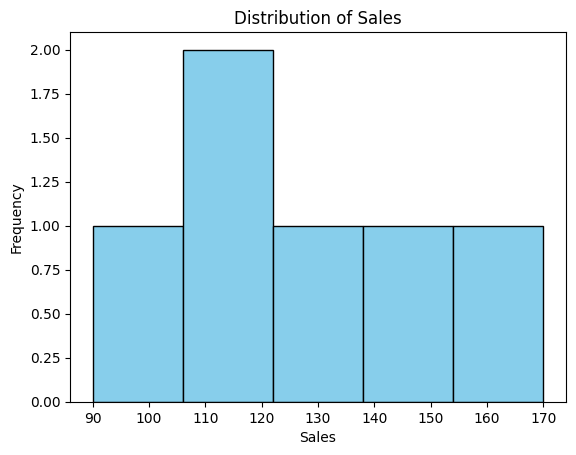

In [4]:
#Quantitative Variable
# Histogram for quantitative variable
plt.hist(df["Sales"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

Task: <br>
Create one countplot for Product and one histogram for Profit. <br>
Compare their patterns and interpret what they mean.

/tmp/ipython-input-302115491.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Product", data=df, palette="Set2")


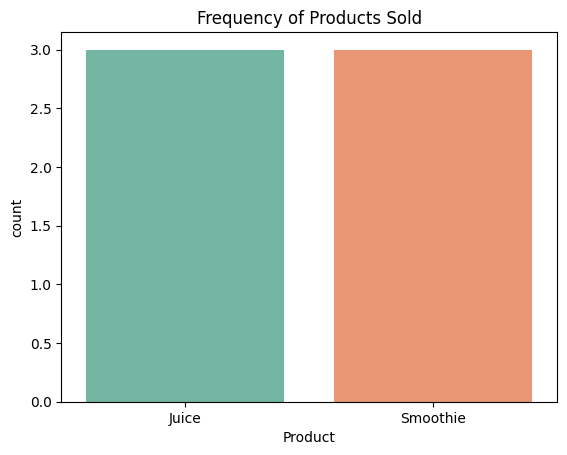

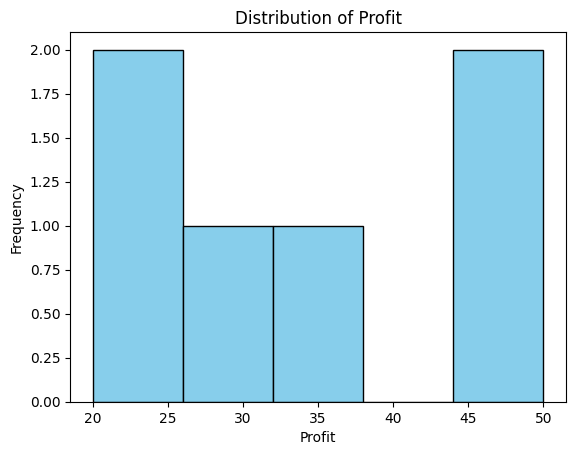

In [5]:
#Code here

# Countplot for Product (categorical variable)
sns.countplot(x="Product", data=df, palette="Set2")
plt.title("Frequency of Products Sold")
plt.show()

# Histogram for Profit (quantitative variable)
plt.hist(df["Profit"], bins=5, color="skyblue", edgecolor="black")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


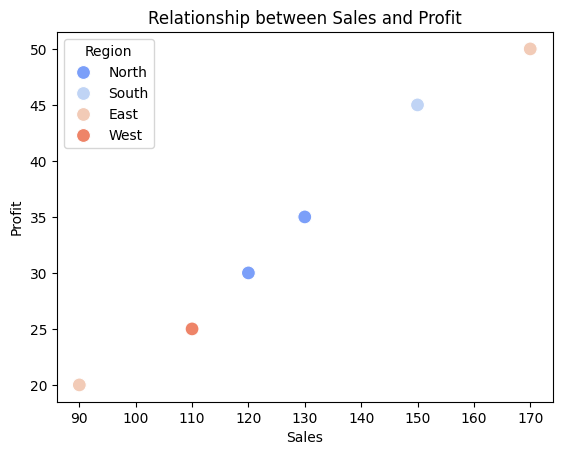

In [ ]:
# Scatterplot: Sales vs Profit
sns.scatterplot(x="Sales", y="Profit", hue="Region", data=df, palette="coolwarm", s=100)
plt.title("Relationship between Sales and Profit")
plt.show()

Section 2: Relationships Between Variables

In [ ]:
# Crosstabulation example
pd.crosstab(df["Region"], df["Product"], values=df["Sales"], aggfunc="mean").fillna(0)


Product,Juice,Smoothie
Region,,
East,90.0,170.0
North,125.0,0.0
South,0.0,150.0
West,0.0,110.0


Task: <br>
Interpret whether higher sales also mean higher profit. <br>
Which region seems to perform best?

*Answer here

The visualizations and crosstabulation indicate a clear positive correlation between sales and profit higher sales generally align with higher profit.  The scatterplot shows that with the increase in sales, profit tends to rise as well.  When examining regional performance, the East region seems to excel, particularly in Smoothies, which boast the highest sales and profit.  The South region shows robust performance, whereas the West region records the lowest average sales and profit.  In general, both the sales volume and profit figures suggest that regions with higher sales tend to produce greater profits, with the East resulting as the leading region in this dataset.

Section 3: Analysis of Missing Data

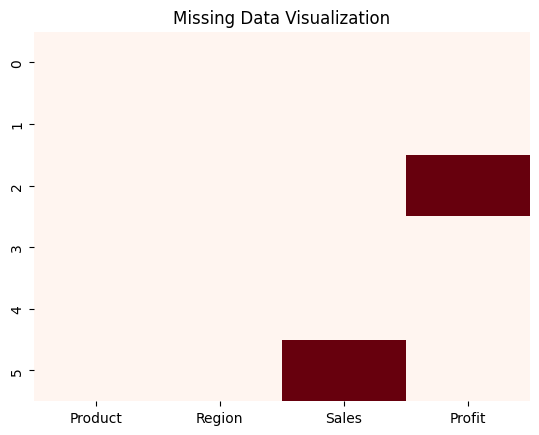

,0
Product,0
Region,0
Sales,1
Profit,1


In [ ]:
# Introduce missing data
df_missing = df.copy()
df_missing.loc[2, "Profit"] = np.nan
df_missing.loc[5, "Sales"] = np.nan

# Visualize missing data
sns.heatmap(df_missing.isnull(), cbar=False, cmap="Reds")
plt.title("Missing Data Visualization")
plt.show()

# Display missing summary
df_missing.isnull().sum()


Task: <br>
Describe what you observe in the missing data visualization. <br>
Which variables need attention before analysis?

*Answer here

In the visualization of missing data, red blocks on the heatmap clearly indicate the gaps in the dataset.  The columns for Product and Region are complete, but the Profit value for row 2 and the Sales value for row 5 are missing.  This shows that the numerical variables Sales and Profit require attention before proceeding with further analysis, as missing values can impact calculations, summaries, and visualizations.  It is essential to address these absent entries by means of computation, replacement, or removal to guarantee that the analysis is accurate and reliable.

Section 4: Visualizing Time-Series Data

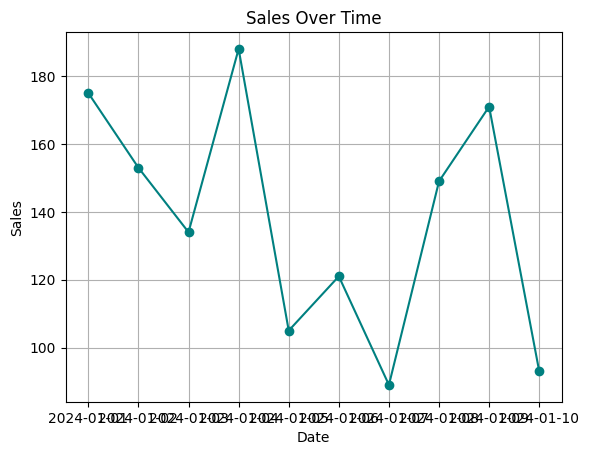

In [ ]:
# Generate time-series example
dates = pd.date_range(start="2024-01-01", periods=10)
sales = np.random.randint(80, 200, 10)
ts_df = pd.DataFrame({"Date": dates, "Sales": sales})

# Line chart for time-series
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal")
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

Task: <br>
Add a moving average line (rolling mean) to smooth fluctuations. <br>
Hint: Use ts_df["Sales"].rolling(window=3).mean().

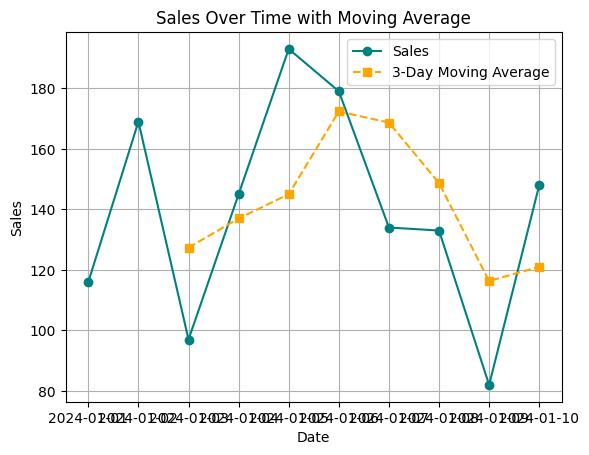

In [ ]:
#Code here

# Calculate 3-day moving average
ts_df["Rolling_Mean"] = ts_df["Sales"].rolling(window=3).mean()

# Plot original sales
plt.plot(ts_df["Date"], ts_df["Sales"], marker="o", color="teal", label="Sales")

# Plot rolling mean
plt.plot(ts_df["Date"], ts_df["Rolling_Mean"], marker="s", color="orange", linestyle="--", label="3-Day Moving Average")

plt.title("Sales Over Time with Moving Average")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


Section 5: Visualizing Geospatial Data

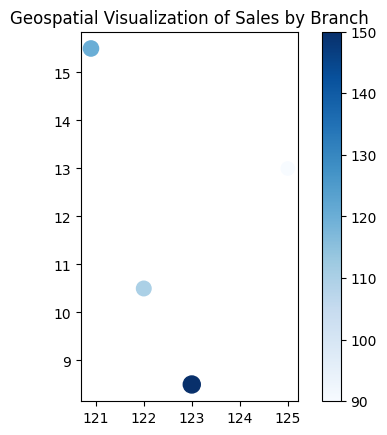

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Sample coordinates (latitude, longitude)
coords = {
    "Branch": ["North", "South", "East", "West"],
    "Latitude": [15.5, 8.5, 13.0, 10.5],
    "Longitude": [120.9, 123.0, 125.0, 122.0],
    "Sales": [120, 150, 90, 110]
}

geo_df = pd.DataFrame(coords)
geo_df["geometry"] = [Point(xy) for xy in zip(geo_df.Longitude, geo_df.Latitude)]
gdf = gpd.GeoDataFrame(geo_df, geometry="geometry")

# Plot simple map (Philippines outline optional if available)
gdf.plot(column="Sales", cmap="Blues", legend=True, markersize=geo_df["Sales"])
plt.title("Geospatial Visualization of Sales by Branch")
plt.show()

Task: <br>
Interpret which branch has the highest sales geographically. <br>
How can such visualization help in business decision-making?

*Answer here

The largest and darkest point on the map indicates that the South branch has the highest sales, as shown in the geospatial visualization.  The East branch, denoted by the smallest and lightest point, has the lowest sales figures.  This kind of visualization enables companies to swiftly pinpoint areas that are excelling and those that are lagging, which empowers managers to make knowledgeable choices like distributing resources, focusing marketing initiatives, launching new outlets, or offering more help where necessary.  When companies view sales patterns geographically, they can gain a better understanding of regional trends and enhance their growth strategies.

Conclusion/Learnings/Analysis.

Before doing formal analysis, exploratory data analysis is performed to understand data quality, connections, and patterns.  Product frequencies and profit distribution were uncovered by single variate analysis using countplots and histograms, which showed balanced product sales and clustered profits.  larger sales typically translate into larger profits, according to a two way study using scatterplots and crosstabulation, with the East and South regions doing the best.  Heatmap analysis of missing data revealed gaps in sales and profit, highlighting the need of attribution or elimination before analysis.  Geospatial plots showed regional sales performance, and time-series visualization using line charts and rolling averages showed sales patterns and fluctuations. These tools helped inform corporate decisions about marketing and spending.  When statistical summaries and visualizations are combined, useful information are shown, patterns are identified, and well informed analysis of data is supported.